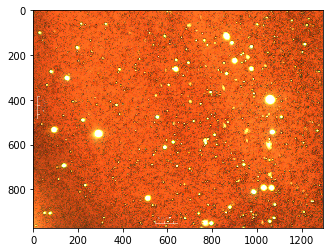

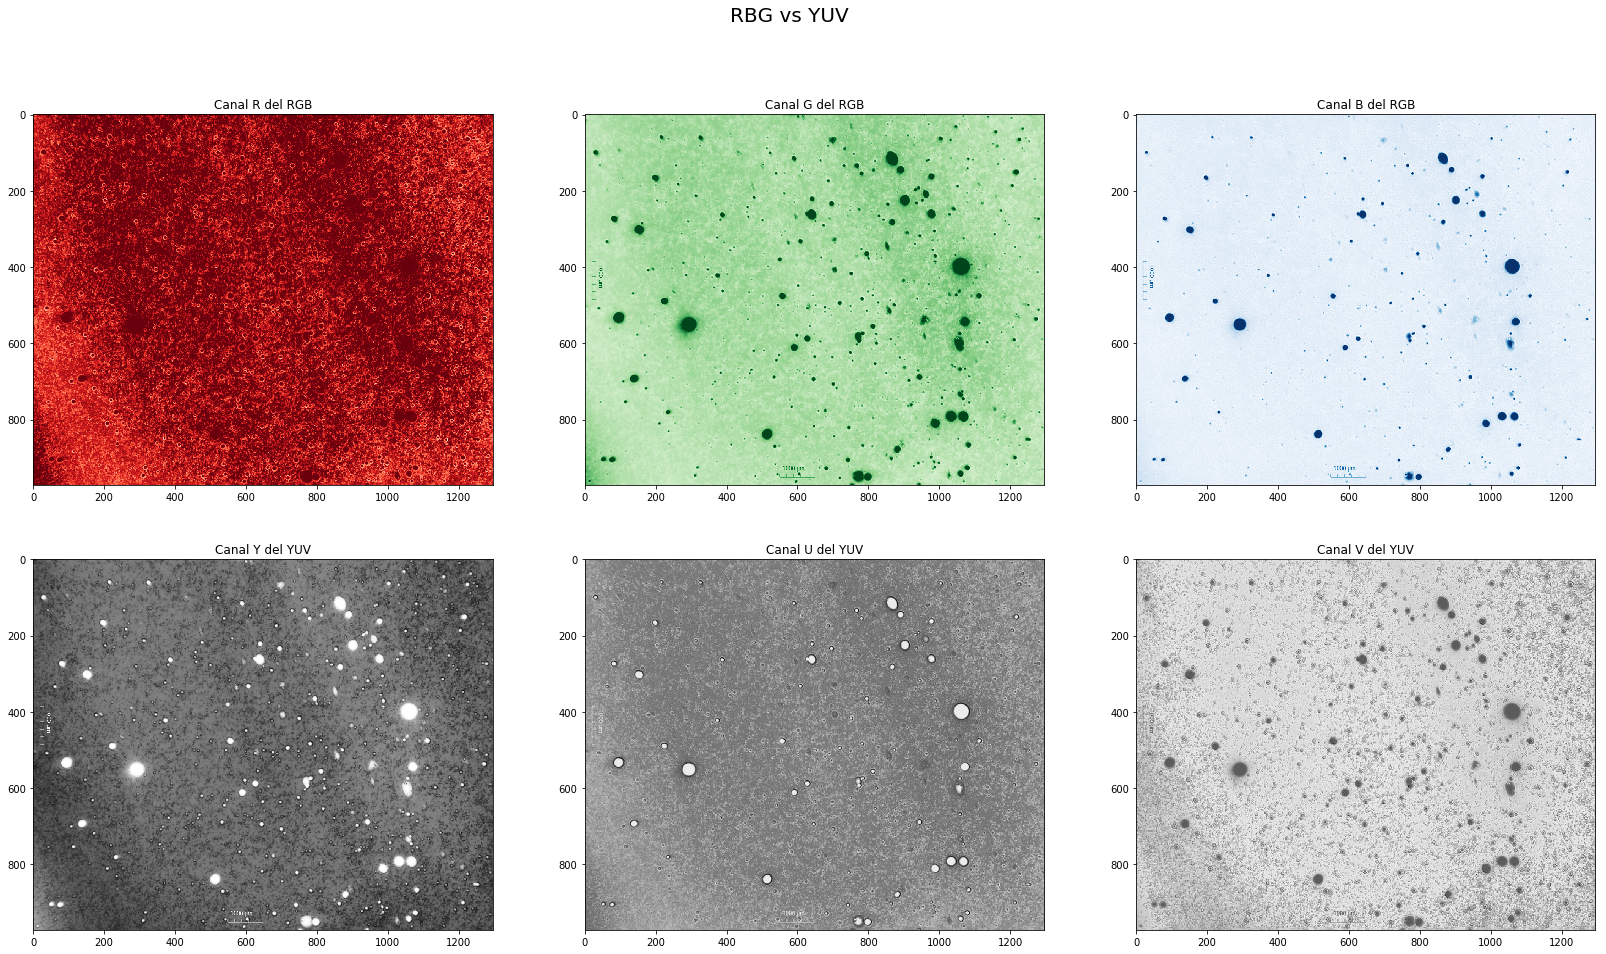

In [24]:
from skimage import io, color
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Leer la imagen y pasarla a RGB
img = cv2.imread("res/imagenes/10 X/Em 300 rpm F1.BMP", cv2.IMREAD_COLOR)

img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Separar el espacio de color YUV en sus canales individuales
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_Y = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]

#Mostrar imagen original

plt.imshow(img_rgb)

#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YUV', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YUV')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal U del YUV')
ax5.imshow(img_U, cmap='gray', aspect='auto')
ax6.set_title('Canal V del YUV')
ax6.imshow(img_V, cmap='gray', aspect='auto')

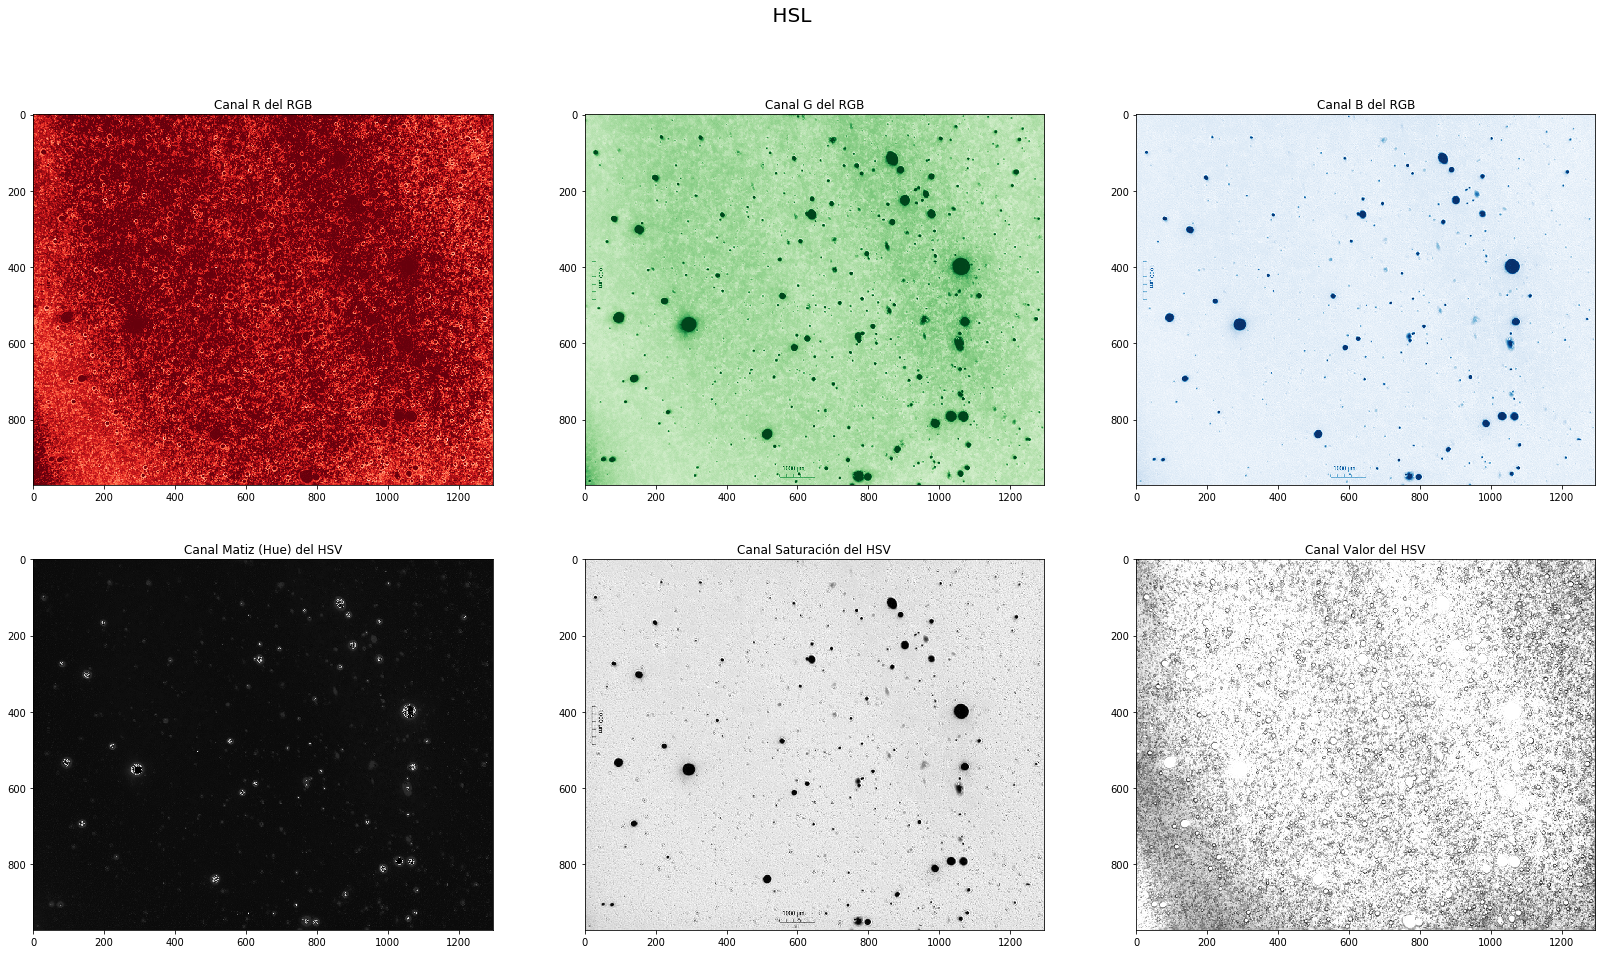

In [2]:

#Conversión automática con la función cv2.cvtColor al canal HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_H = img_hsv[:,:,0]
img_S =  img_hsv[:,:,1]
img_V = img_hsv[:,:,2]
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle(' HSL', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Matiz (Hue) del HSV')
ax4.imshow(img_H, cmap='gray', aspect='auto')
ax5.set_title('Canal Saturación del HSV')
ax5.imshow(img_S, cmap='gray', aspect='auto')
ax6.set_title('Canal Valor del HSV')
ax6.imshow(img_V, cmap='gray', aspect='auto')

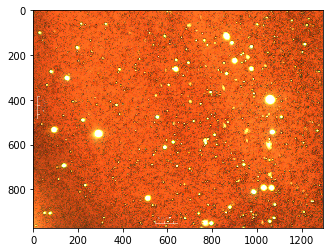

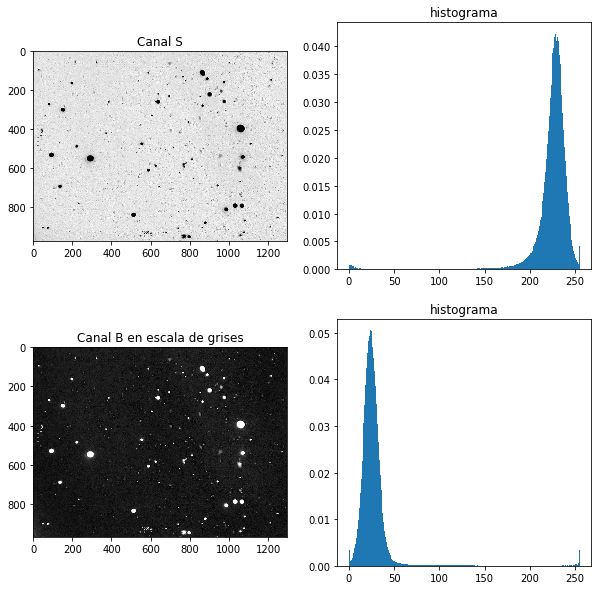

In [23]:
I1=img_S
I2=img_B

plt.imshow(img_rgb)

I1_array=I1.ravel()
#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(2,2, figsize=(10, 10))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('Canal S')
#Imprimir la imagen I1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(I1, cmap="gray")
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(I1_array, bins=255, range=(0.0, 255.0), normed=True)



I2_array=I2.ravel()

arreglo_plots[1,0].set_title('Canal B en escala de grises')
#Imprimir la imagen I1 en la posición (0.0) del arreglo
arreglo_plots[1,0].imshow(I2, cmap="gray")
#Título del cuadro en la posición (0,1)
arreglo_plots[1,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[1,1].hist(I2_array, bins=255, range=(0.0, 255.0), normed=True)


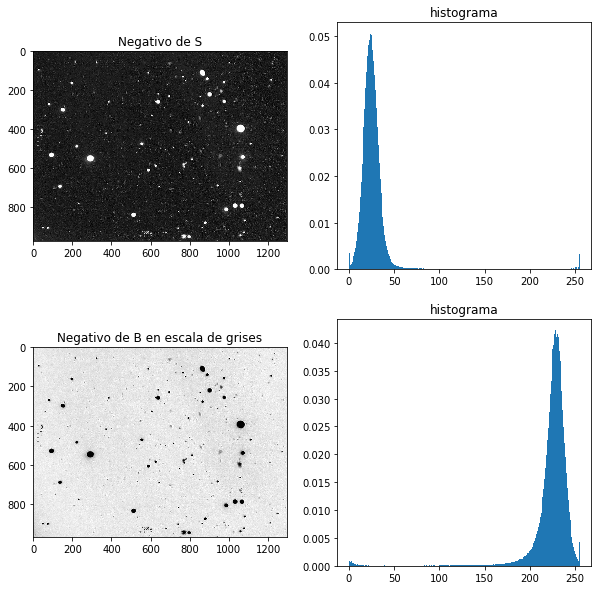

In [33]:
I1=img_S
I2=img_B

I1_subtract= np.zeros(I1.shape, np.uint8)
#El negativo de la imagen corresponde a restar de la matriz cuyas componentes son 255,
#la matriz de la imagen que cargamos
I1_subtract = cv2.subtract(255, I1)

I2_subtract= np.zeros(I2.shape, np.uint8)
I2_subtract = cv2.subtract(255, I2)



#Se genera un arreglo para imprimir las imágenes, 4x2, 4 imágenes y 4 histogramas asociados.
fig, arreglo_plots = plt.subplots(2,2, figsize=(10, 10))
#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('Negativo de S')
#Imprimir la imagen I1 en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(I1_subtract, cmap="gray")
#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('histograma')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[1,1].hist(I1_array, bins=255, range=(0.0, 255.0), normed=True)


#Título del cuadro en la posición (1,0)
arreglo_plots[1,0].set_title('Negativo de B en escala de grises')
#Imprimir la imagen I2 en la posición (1.0) del arreglo
arreglo_plots[1,0].imshow(I2_subtract, cmap="gray")
#Título del cuadro en la posición (1,1)
arreglo_plots[1,1].set_title('histograma')
#Imprimir el histograma en la posición (1,1)
_ = arreglo_plots[0,1].hist(I2_array, bins=255, range=(0.0, 255.0), normed=True)


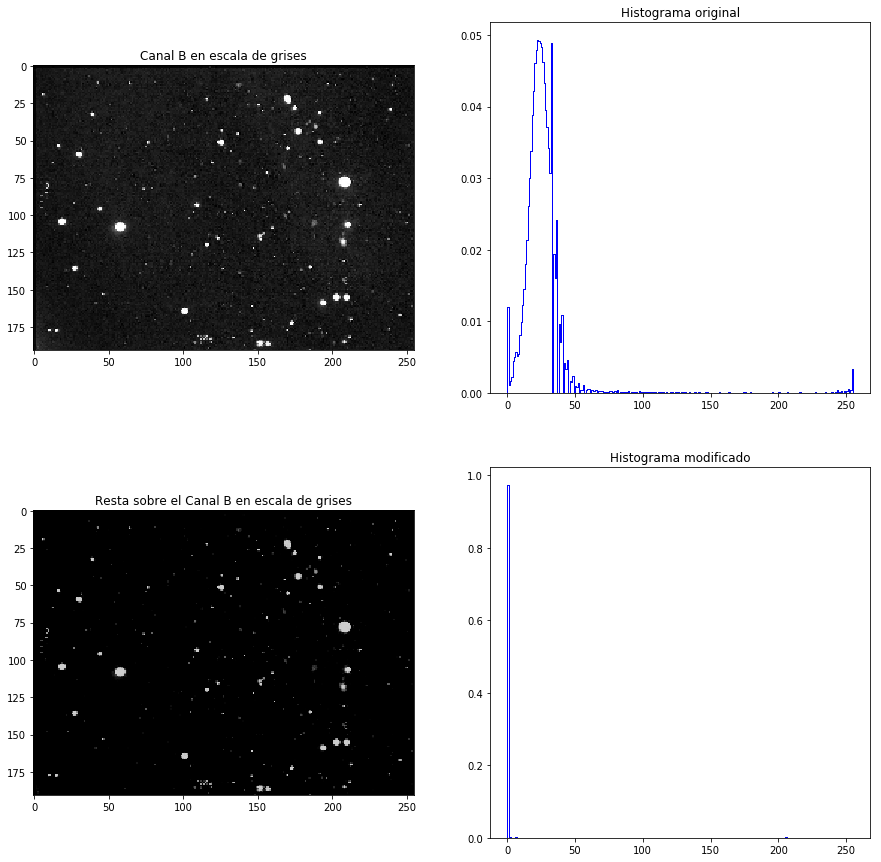

In [29]:
#Se lee la imagen 
img = cv2.cvtColor(cv2.imread('res/negativo2.png'), cv2.COLOR_BGR2RGB)
#Se crea la imagen copia para editarla
img_subtract = np.zeros(img.shape, np.uint8)
#Se restan q,w,e unidades a los canales de img.
#Se sustituyen los valores de cada canal de la copia por los valores modificados de la imagen original
q = 50; w = 50; e = 50
img_subtract[:,:,0] = cv2.subtract(img[:,:,0], q)
img_subtract[:,:,1] = cv2.subtract(img[:,:,1], w)
img_subtract[:,:,2] = cv2.subtract(img[:,:,2], e)

#Se realiza el arreglo de 2x2 para mostrar imagen e imagen modificada vs histogramas
fig, arreglo_plots = plt.subplots(2,2, figsize=(15, 15))
colors = ('r','g','b')

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Canal B en escala de grises')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Resta sobre el Canal B en escala de grises')
arreglo_plots[1,0].imshow(img_subtract, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = img_subtract[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])